# The Heat Equation #

As an extension of the Poisson equation, we consider the time-dependent heat equation, or the time-dependent diffusion equation. This is a natural extension of the Poisson equation describing the stationary distribution of heat in a body to a time-dependent problem.

## PDE problem ##

Our model problem for time-dependent PDEs reads


\begin{alignat}{2}
{\partial u\over\partial t} &= \Delta u + f \quad &&\hbox{in }\Omega\times(0, T],
\label{eq:diffusion0:pde1}\\
u &= u_D &&\hbox{on } \partial \Omega\times(0, T],
\label{eq:diffusion0:pde1:bc}\\
u &= u_0 &&\mbox{at } t=0.
\label{eq:diffusion0:pde1:ic}
\end{alignat}

Here, $u$ varies with space and time, e.g., $u=u(x,y,t)$ if the spatial
domain $\Omega$ is two-dimensional. The source function $f$ and the
boundary values $u_D$ may also vary with space and time.
The initial condition $u_0$ is a function of space only.

## Variational formulation ##

A straightforward approach to solving time-dependent PDEs by the
finite element method is to first discretize the time derivative by a
finite difference approximation, which yields a sequence of
stationary problems, and then turn each stationary problem into a
variational formulation.

Let superscript $(k)$ denote a quantity at time $t_k$, where $k$ is an
integer counting time levels. For example, $u^{(k)}$ means $u$ at time
level $k$. A finite difference discretization in time first consists
of sampling the PDE at some time level, say $t_{k+1}$:

\begin{equation}
\left({\partial u \over\partial t}\right)^{(k+1)} = \Delta u^{(k+1)} + f^{(k+1)}.
\label{eq:diffusion0:pde1:tk}
\end{equation}

The time-derivative can be approximated by a difference quotient.
For simplicity and stability reasons, we choose a
simple backward difference:

\begin{equation}
\left({\partial u\over\partial t}\right)^{(k+1)}\approx {{u^{(k+1)} - u^{(k)}}\over{\delta t}},
\label{eq:diffusion0:BE}
\end{equation}
where $\delta t$ is the time discretization parameter.
Inserting (\ref{eq:diffusion0:BE}) in (\ref{eq:diffusion0:pde1:tk}) yields

\begin{equation}
{{u^{(k+1)} - u^{(k)}}\over{\delta t}} = \Delta u^{(k+1)} + f^{(k+1)}.
\label{eq:diffusion0:pde1:BE}
\end{equation}

This is our time-discrete version of the heat equation
(\ref{eq:diffusion0:pde1}), a so-called *backward Euler* or *implicit
Euler* discretization.

We may reorder (\ref{eq:diffusion0:pde1:BE}) so
that the left-hand side contains the terms with the unknown $u^{(k+1)}$ and
the right-hand side contains computed terms only. The result
is a sequence of spatial (stationary) problems for $u^{(k+1)}$, assuming
$u^(k)$ is known from the previous time step:

\begin{align}
u^0 &= u_0, \label{eq:diffusion0:pde1:u0}\\
u^{(k+1)} - {\delta t}\Delta u^{(k+1)} &=  u^{(k)} + {\delta t} f^{(k+1)},\quad k=0,1,2,\ldots
\label{eq:diffusion0:pde1:uk}
\end{align}

Given $u_0$, we can solve for $u^0$, $u^1$, $u^2$, and so on.

An alternative to (\ref{eq:diffusion0:pde1:uk}), which can be
convenient in implementations, is to collect
all terms on one side of the equality sign:

\begin{equation}
u^{(k+1)} - {\delta t}\Delta u^{(k+1)} - u^{(k)} - {\delta t} f^{(k+1)} = 0,\quad k=0,1,2,\ldots
\label{eq:diffusion0:pde1:uk2}
\end{equation}

We use a finite element method to solve
(\ref{eq:diffusion0:pde1:u0}) and either of the equations
(\ref{eq:diffusion0:pde1:uk}) or (\ref{eq:diffusion0:pde1:uk2}). This
requires turning the equations into weak forms.  As usual, we multiply
by a test function $v\in \hat V$ and integrate second-derivatives by
parts. Introducing the symbol $u$ for $u^{(k+1)}$ (which is natural in the
program), the resulting weak form arising from
formulation (\ref{eq:diffusion0:pde1:uk})
can be conveniently written in
the standard notation:

\[ a(u,v)=L_{k+1}(v),\]

where

\begin{align}
a(u,v) &= \int_\Omega\left(uv + {\delta t}
\boldsymbol{\nabla} u\cdot \boldsymbol{\nabla} v\right) \mbox{d}x, \label{eq:diffusion0:pde1:a}\\
L_{k+1}(v) &= \int_\Omega \left(u^{(k)} + {\delta t}  f^{(k+1)}\right)v \mbox{d}x.
\label{eq:diffusion0:pde1:L}
\end{align}

The alternative form (\ref{eq:diffusion0:pde1:uk2}) has an
abstract formulation

\[ F_{k+1}(u;v) = 0,\]

where

\begin{equation}
F_{k+1}(u; v) = \int_\Omega \left(uv + {\delta t}
\boldsymbol{\nabla} u\cdot \boldsymbol{\nabla} v -
(u^{(k)} + {\delta t} f^{(k+1)})v\right) \mbox{d}x.
\label{eq:diffusion0:pde1:F}
\end{equation}

In addition to the variational problem to be solved in each time step,
we also need to approximate the initial condition
(\ref{eq:diffusion0:pde1:u0}). This equation can also be turned into a
variational problem:

\[ a_0(u,v)=L_0(v),\]
with

\begin{align}
a_0(u,v) &= \int_\Omega uv \mbox{d}x, \label{eq:diffusion0:pde1:a0}\\
L_0(v) &= \int_\Omega u_0 v \mbox{d}x. \label{eq:diffusion0:pde1:L0}
\end{align}

When solving this variational problem, $u^{(0)}$ becomes the $L^2$
projection of the given initial value $u^{(0)}$ into the finite element
space. The alternative is to construct $u^{(0)}$ by just interpolating the
initial value $u^{(0)}$; that is, if $$u^{(0)}=\sum_{j=1}^n U_j^{(0)}\phi_j,$$ we
simply set $$U_j^{(0)}=u_0(x_j,y_j),$$ where $(x_j,y_j)$ are the coordinates
of node number $j$. We refer to these two strategies as computing the
initial condition by either *projection* or *interpolation*. Both
operations are easy to compute in FEniCS through a single statement,
using either the `project` or `interpolate` function. The most common
choice is `project`, which computes an approximation to $u_0$, but in
some applications where we want to verify the code by reproducing
exact solutions, one must use `interpolate` (and we use such a test
problem here!).

In summary, we thus need to solve the following sequence of variational
problems to compute the finite element solution to the heat equation:
* find $u^{(0)}\in V$ such that $a_0(u^{(0)},v)=L_0(v)$ holds for all $v\in\hat V$,
* for $k=0,1,2,\ldots$, find $u^{(k+1)}\in V$
such that $a(u^{(k+1)},v)=L_{k+1}(v)$ for all $v\in\hat V$.

## FEniCS implementation ##

Our program needs to implement the time-stepping manually, but can
rely on FEniCS to easily compute $a_0$, $L_0$, $a$, and $L$ (or
$F_{k+1}$), and solve the linear systems for the unknowns.

### Test problem 1: A known analytical solution ###

Just as for the Poisson problem, we construct a test problem 
that makes it easy to determine if the
calculations are correct. Since we know that our first-order
time-stepping scheme is exact for linear functions, we create a test
problem which has a linear variation in time. We combine this with a
quadratic variation in space. We thus take

\begin{equation} u = 1 + x^2 + \alpha y^2 + \beta t,
\label{eq:diffusion0:pde1:u0test}
\end{equation}

which yields a function whose computed values at the nodes will be
exact, regardless of the size of the elements and $\delta t$, as long as
the mesh is uniformly partitioned. 

By inserting
(\ref{eq:diffusion0:pde1:u0test}) into the heat equation
(\ref{eq:diffusion0:pde1}), we find that the right-hand side $f$ must
be given by $$f(x,y,t)=\beta - 2 - 2\alpha.$$ The boundary value
is $$u_D(x, y, t) = 1 + x^2 + \alpha y^2 + \beta t$$ and the initial
value is $$u_0(x, y) = 1 + x^2 + \alpha y^2.$$

### FEniCS implementation ###

In [1]:
from __future__ import print_function
from fenics import *
import numpy as np
%matplotlib inline

We first create a mesh:

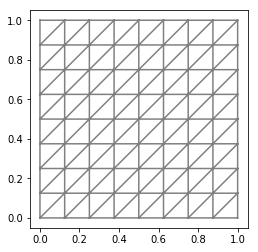

In [2]:
# Create mesh and define function space
nx = ny = 8
mesh = UnitSquareMesh(nx, ny)
plot(mesh)
V = FunctionSpace(mesh, 'P', 1)

A new programming issue is how to deal with functions that vary in
space *and time*, such as the boundary condition $$u_D(x, y,
t) = 1 + x^2 + \alpha y^2 + \beta t.$$ 
A natural solution is to use a
FEniCS `Expression` with time $t$ as a parameter, in addition to the
parameters $\alpha$ and $\beta$:

In [3]:
T = 2.0            # final time
num_steps = 10     # number of time steps
dt = T / num_steps # time step size

alpha = 3; beta = 1.2
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
                 degree=2, alpha=alpha, beta=beta, t=0)

This `Expression` uses the components of `x` as independent
variables, while `alpha`, `beta`, and `t` are parameters. The
time `t` can later be updated by

```
u_D.t = t
```

The essential boundary conditions, along the entire boundary in this case,
are implemented in the same way as we have previously implemented the
boundary conditions for the Poisson problem:

In [4]:
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

We shall use the variable `u` for the unknown $u^{(k+1)}$ at the new
time step and the variable `u_k` for $u^{(k)}$ at the previous time
step. The initial value of `u_k` can be computed by either projection
or interpolation of $u_0$. Since we set `t = 0` for the boundary value
`u_D`, we can use `u_D` to specify the initial condition $u_0$:

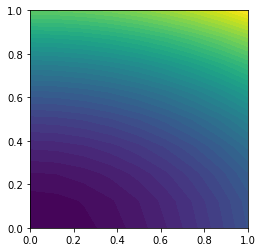

In [5]:
u_k = interpolate(u_D, V)

plot(u_k)

or you can use 
```
u_k = interpolate(u_D, V)
```

**Warning**: Projecting versus interpolating the initial condition
To actually recover the exact solution
(\ref{eq:diffusion0:pde1:u0test}) to machine precision, it is important
to compute the discrete initial condition by interpolating $u_0$. This
ensures that the degrees of freedom are exact (to machine precision)
at $t=0$. Projection results in approximate values at the nodes.

We may either define $a$ or $L$ according to the formulas above, or we
may just define $F$ and ask FEniCS to figure out which terms should go
into the bilinear form $a$ and which should go into the linear form
$L$. The latter is convenient, especially in more complicated
problems, so we illustrate that construction of $a$ and $L$:

In [6]:
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

F = u*v*dx + dt*dot(grad(0.5*(u+u_k)), grad(v))*dx - (u_k + dt*f)*v*dx
a, L = lhs(F), rhs(F)

Finally, we perform the time-stepping in a loop:

t = 0.20: error = 7.55e-15
t = 0.40: error = 5.77e-15
t = 0.60: error = 7.11e-15
t = 0.80: error = 7.55e-15
t = 1.00: error = 7.99e-15
t = 1.20: error = 8.44e-15
t = 1.40: error = 8.44e-15
t = 1.60: error = 8.88e-15
t = 1.80: error = 1.15e-14
t = 2.00: error = 9.77e-15


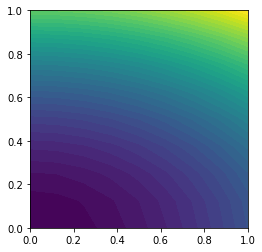

In [7]:
u = Function(V)
t = 0

for k in range(num_steps):

    # Update current time
    t += dt
    u_D.t = t

    # Solve variational problem
    solve(a == L, u, bc)

    # Compute error
    u_e = interpolate(u_D, V)
    error = np.abs(u_e.vector().array() -
                   u.vector().array()).max()
    print('t = %.2f: error = %.3g' % (t, error))

    # Update previous solution
    u_k.assign(u)
    
plot(u_k)

In the last step of the time-stepping loop, we assign the values of
the variable `u` (the new computed solution) to the variable `u_k`
containing the values at the previous time step. This must be done
using the `assign` member function. If we instead try to do `u_k = u`,
we will set the `u_k` variable to be the *same* variable as `u`
which is not what we want. (We need two variables, one for the values
at the previous time step and one for the values at the current time
step.)

**Warning**: Remember to update expression objects with the current time!
Inside the time loop, observe that `u_D.t` must be updated before the
`solve` statement to enforce computation of Dirichlet conditions at
the current time step. A Dirichlet condition defined in terms of an
`Expression` looks up and applies the value of a parameter such as `t`
when it gets evaluated and applied to the linear system.

For the Poisson example, we used the function
`compute_vertex_values` to extract the function values at the
vertices. Here we illustrate an alternative method to extract the
vertex values, by calling the function `vector`, which returns
the vector of degrees of freedom. For a $\mathsf{P}_1$
function space, this vector of degrees of freedom will be equal to
the array of vertex values obtained by calling
`compute_vertex_values`, albeit possibly in a different order.

This example program can be found in the file [ft03_heat.py](https://fenicsproject.org/pub/tutorial/python/vol1/ft03_heat.py).

### Test problem 2: Diffusion of a Gaussian function ###

Let us now solve a more interesting test problem, namely the diffusion of
a Gaussian hill. We take the initial value to be

\[ u_0(x,y)= e^{-ax^2 - ay^2}\]

for $a = 5$ on the domain $[-2,2]\times [-2,2]$. For this
problem we will use homogeneous Dirichlet boundary conditions ($u_D = 0$).

### FEniCS implementation ###

Which are the required changes to our previous program? One major
change is that the domain is no longer a unit square. The new domain can
be created easily in FEniCS using `RectangleMesh`:

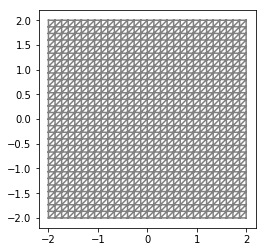

In [8]:
nx = ny = 30
mesh = RectangleMesh(Point(-2, -2), Point(2, 2), nx, ny)
plot(mesh)

V = FunctionSpace(mesh, 'P', 1)

Note that we have used a much higher resolution than before to better
resolve the features of the solution. We also need to redefine the
initial condition and the boundary condition. Both are easily changed by
defining a new `Expression` and by setting $u = 0$ on the boundary.

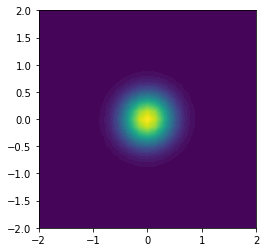

In [9]:
# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree=2, a=5)
u_k = interpolate(u_0, V)

plot(u_k)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

We can now define the variational problem.

In [10]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

T = 2.0            # final time"
num_steps = 50     # number of time steps
dt = T / num_steps # time step size

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_k + dt*f)*v*dx
a, L = lhs(F), rhs(F)

To be able to visualize the solution in an external program such as
ParaView, we will save the solution to a file in VTK format in each time
step. We do this by first creating a `File` with the suffix `.pvd`:
```
vtkfile = File('heat_gaussian/solution.pvd')
```
and inside the time loop, we may then append the solution values to
this file:
```
vtkfile << (u, t)
```

This line is called in each time step, resulting in the creation of
a new file with suffix `.vtu` containing all data for the time
step (the mesh and the vertex values). The file
`heat_gaussian/solution.pvd` will contain the time values and
references to the `.vtu` file, which means that the `.pvd` file will be a
single small file that points to a large number of `.vtu` files
containing the actual data. Note that we choose to store the solution
to a subdirectory named `heat_gaussian`. This is to avoid cluttering
our source directory with all the generated data files.
One does not need to create the directory before running the
program as it will be created automatically by FEniCS.

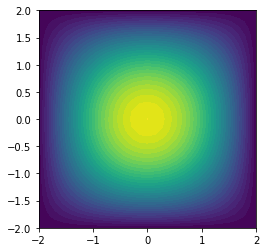

In [11]:
# Create VTK file for saving solution
vtkfile = File('heat_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0
for k in range(num_steps):

    # Update current time
    t += dt

    # Compute solution
    solve(a == L, u, bc)

    # Save to file and plot solution
    vtkfile << (u, t)

    # Update previous solution
    u_k.assign(u)
    
plot(u_k)

This example program can be found in the file [ft04_heat_gaussian.py](https://fenicsproject.org/pub/tutorial/python/vol1/ft04_heat_gaussian.py).

## Visualization in ParaView ##

To visualize the diffusion of the Gaussian hill, start `ParaView`,
choose _File--Open..._, open `heat_gaussian/solution.pvd`, and click
_Apply_ in the Properties pane. Click on the play button to display
an animation of the solution. To save the animation to a file, click
_File--Save Animation..._ and save the file to a desired file format,
for example AVI or Ogg/Theora.
Once the animation has been saved to a file, you can play the animation
offline using a player such as `mplayer` or `VLC`, or upload your
animation to YouTube.

## Excercise ##

Change the code for Test problem 2 to use trapzoid method in time:
\begin{equation}
\frac{u^{(k+1)}-u^{(k)}}{\delta t}=\frac{\Delta u^{(k)}+\Delta u^{(k+1)}}{2}+f^{(k+\frac{1}{2})}.
\label{eq:diffusion0:pde1:trapzoid}
\end{equation}

**Acknowledgment**: This notebook was adapted from Chapter 3 of [The FEniCS Tutorial Volume I](https://fenicsproject.org/pub/tutorial/sphinx1/) by Hans Petter Langtangen and Anders Logg, released under CC Attribution 4.0 license.